# Multivariate Gaussian distribution and its properties

$\newcommand{\normaldistr}{\mathcal{N}}$

**References:**
- K. P. Murphy: Machine Learning, A probabilistic perspective, Chapter 4.

## Parameters

Multivariate Gaussian distribution has the following parameters:
- $\vec{\mu}$ mean of the distribution
- $\matrix{\Sigma}$ covariance matrix of the distribution

## PDFs

### Joint PDF

$\vec{x} \in \mathbb{R}^{n}$

\begin{equation}
\boxed{
   \text{PDF}(\vec{x})
   =
   \mathcal{N}
   (\vec{x} | \vec{\mu}, \matrix{\Sigma})
   =
   \frac{1}{\sqrt{ (2\pi)^{n} \det{\matrix{\Sigma}}}}
   \exp{
      \left[ 
         -\frac{1}{2}
         ( \vec{x} - \vec{\mu})^{T}
         \matrix{\Sigma}^{-1}
         (\vec{x}-\vec{\mu})
      \right] }
}
\end{equation}

### Marginal PDF


\begin{equation}
\boxed{
   \text{PDF}(\vec{x_{S}})
   =
   \mathcal{N}
   (\vec{x_{S}} | \vec{\mu_{S}}, \matrix{\Sigma_{S}})
   =
   \frac{1}{\sqrt{(2\pi)^{n_{S}} \det{\matrix{\Sigma_{S}}}}}
   \exp{
      \left[ 
         -\frac{1}{2}
         ( \vec{x} - \vec{\mu_{S}})^{T}
         \matrix{\Sigma_{S}}^{-1}
         (\vec{x}-\vec{\mu_{S}})
      \right] }
 }
\end{equation}

### Conditional PDF

Considering the partition of components of the original vector $\vec{x}$:
- $\vec{x_{A}}$ assumed to be unknown
- $\vec{x_{B}}$ assumed to be known/fixed

\begin{equation}
\boxed{
   PDF(\vec{x_{A}} | \vec{x_{B}})
   =
   \normaldistr
   \left(
      \vec{x_{A}} | \vec{\mu_{A|B}}, \matrix{\Sigma_{A|B}}
   \right)
   =
   \frac{1}{\sqrt{ (2\pi)^{n_{A}} \det{\matrix{\Sigma_{A|B}} }}}
   \exp{
      \left[ 
         -\frac{1}{2}
         ( \vec{x} - \vec{\mu_{A|B}} )^{T}
         \matrix{\Sigma_{A|B}}^{-1}
         (\vec{x}-\vec{\mu_{A|B}})
      \right] },
}
\end{equation}


where 
- $\vec{\mu_{A|B}}$ is mean vector of the conditional distribution
    \begin{equation}
    \begin{aligned}
      \vec{\mu_{A|B}}
      &=
      \vec{\mu_{A}}
      +
      \matrix{\Sigma_{AB}}
      \matrix{\Sigma_{BB}}^{-1}
      (\vec{x_{B}} - \vec{\mu_{B}}) \\
      &=
      \vec{\mu_{A}}
      -
      \matrix{\Lambda^{-1}_{AA}}
      \matrix{\Lambda_{AB}}
      (\vec{x_{B}} - \vec{\mu_{B}}) \\
      &=
      \matrix{\Sigma_{A|B}}
      \left(
         \matrix{\Lambda_{AA}}
         \vec{\mu_{A}}
         -
         \matrix{\Lambda_{AB}}
         ( \vec{x_{B}} - \vec{\mu_{B}} )
      \right)
   \end{aligned}
   \end{equation}
    Note that $\vec{\mu_{A|B}}$ is a linear function of $\vec{x_{B}}$
- $\matrix{\Sigma_{A|B}}$ is the covariance matrix of conditional distribution
   \begin{equation}
      \matrix{\Sigma_{A|B}}
      =
      \matrix{\Sigma_{AA}}
      -
      \matrix{\Sigma_{AB}}
      \matrix{\Sigma_{BB}}^{-1}
      \matrix{\Sigma_{BA}}
      =
      \matrix{\Lambda_{AA}}^{-1}
   \end{equation}
   Note that $\matrix{\Sigma_{A|B}}$ is independent of $\vec{x_{B}}$

In [46]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2D Gaussian distribution

IsoPDF ellipse

$\phi$: angle between the major axis and the horizontal axis $x_{1}$

\begin{equation}
    \tan 2 \phi
    =
    \frac{2 \rho \sigma_{1} \sigma_{2} }{ \sigma^{2}_{1} - \sigma^{2}_{2} }
\end{equation}

or, in a more compact form

\begin{equation}
    \frac{1}{2}
    \arctan 
    =
    \frac{2 \rho \sigma_{1} \sigma_{2} }{ \sigma^{2}_{1} - \sigma^{2}_{2} }
\end{equation}


Ratio of the major and minor axis:

\begin{equation}
    r
    =
    \sqrt{
   \frac{
         \sigma^{2}_{1} + \sigma^{2}_{2}
         +
         \sqrt{ \left(
                  \sigma^{2}_{1} - \sigma^{2}_{2}
                \right)^{2}
                +
                4 \rho^{2} \sigma^{2}_{1} \sigma^{2}_{2} }
        }
        {
         \sigma^{2}_{1} + \sigma^{2}_{2}
         -
         \sqrt{ \left(
                  \sigma^{2}_{1} - \sigma^{2}_{2}
                \right)^{2}
                +
                4 \rho^{2} \sigma^{2}_{1} \sigma^{2}_{2} }
        } 
     }
\end{equation}

In [47]:
def calc_major_minor_axis_ratio(C):
    """
    Calculate th
    
    Arguments
    ---------
    C : np.array
        Covariance matrix.
    
    Returns
    -------
    r : float
        Ratio between the major and minor axis.
    """
    
    sigma1_sqr = C[0,0]
    sigma2_sqr = C[1,1]
    sigma12_sqr = C[0,1]
    rho_sqr = sigma12_sqr/(sigma1_sqr*sigma2_sqr)
    
    tr = np.trace(C)
    
    r_num = 0.5*(tr + np.sqrt(  (sigma1_sqr-sigma2_sqr)**2 + 4.0*sigma12_sqr**2 ))
    r_den = 0.5*(tr - np.sqrt(  (sigma1_sqr-sigma2_sqr)**2 + 4.0*sigma12_sqr**2 ))
    r = np.sqrt(r_num/r_den)
    
    return r

In [48]:
mean = (0.0, 0.0)
sigma1, sigma2 = 1.0, 1.0
rho = 0.8
cov = np.array([[sigma1**2,         rho*sigma1*sigma2],
                [rho*sigma1*sigma2,         sigma2**2]])

In [49]:
mvn = stats.multivariate_normal(mean=mean, cov=cov)

In [50]:
x1_min, x1_max = -1.0, 1.0
x2_min, x2_max = -1.0, 1.0
x1_grid = np.linspace(x1_min, x1_max, 100)
x2_grid = np.linspace(x2_min, x2_max, 100)
xx, yy = np.meshgrid(x1_grid, x2_grid)

In [51]:
x_grid = np.stack((xx,yy), axis=2)
x_grid.shape

(100, 100, 2)

In [52]:
mvn_pdf = mvn.pdf(x_grid)
mvn_logpdf = mvn.logpdf(x_grid)

### Joint PDF

In [55]:
r = np.divide( (2.0*sigma1*sigma2), (sigma1**2 - sigma2**2))
phi = 0.5 * np.arctan(r)
major_axis_slope = np.tan(phi)
minor_axis_slope = np.tan(phi-0.5*np.pi)

/home/edy/lib/build/anaconda/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [57]:
major_axis_slope, minor_axis_slope

(0.9999999999999999, -0.9999999999999999)

In [58]:
major_axis_x1_grid = x1_grid
minor_axis_x1_grid = x1_grid
major_axis_x2_grid = x1_grid*major_axis_slope
minor_axis_x2_grid = x2_grid*minor_axis_slope

In [59]:
major_minor_axis_length_ratio = calc_major_minor_axis_ratio(cov)
major_minor_axis_length_ratio

3.0000000000000004

In [60]:
major_axis_pt = np.array([0.5, 0.5*major_axis_slope])
minor_axis_pt = np.array([0.5, 0.5*minor_axis_slope])

Normalize

In [61]:
major_axis_pt = 0.1*major_axis_pt/np.sqrt((major_axis_pt.dot(major_axis_pt)))
minor_axis_pt = 0.1*minor_axis_pt/np.sqrt((minor_axis_pt.dot(minor_axis_pt)))

In [62]:
major_axis_pt = major_axis_pt*major_minor_axis_length_ratio

Text(0.5, 1.0, 'PDF')

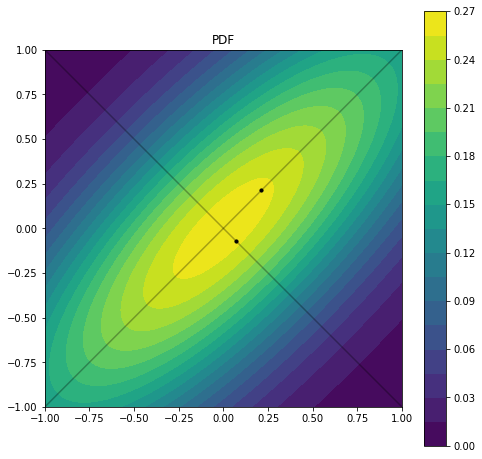

In [63]:
fig, ax = plt.subplots(figsize=(8,8))
cs = ax.contourf(xx, yy, mvn_pdf, levels=20)
fig.colorbar(cs)
ax.plot(major_axis_x1_grid, major_axis_x2_grid, c='k', alpha=0.3)
ax.plot(minor_axis_x1_grid, minor_axis_x2_grid, c='k', alpha=0.3)
ax.scatter(major_axis_pt[0], major_axis_pt[1], s=10, c='k')
ax.scatter(minor_axis_pt[0], minor_axis_pt[1], s=10, c='k')
ax.set_aspect(1.0)
ax.set_title("PDF")

Text(0.5, 1.0, 'Log PDF')

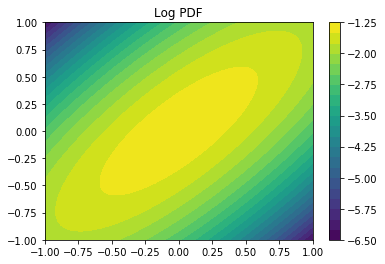

In [64]:
fig, ax = plt.subplots()
cs = ax.contourf(xx, yy, mvn_logpdf, levels=20)
fig.colorbar(cs)
ax.set_title("Log PDF")

### Marginal

In [19]:
marginal_norm = stats.norm(loc=mean[0], scale=cov[0,0])

In [20]:
x_grid = np.linspace(-2.0, 2.0, 100)

In [21]:
marginal_pdf = marginal_norm.pdf(x_grid)

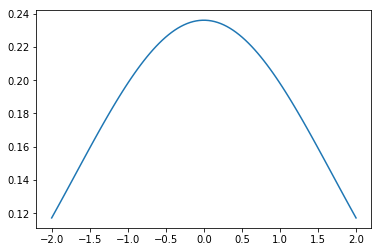

In [22]:
fig, ax = plt.subplots()
ax.plot(x_grid, marginal_pdf)

### Conditional

\begin{equation}
   PDF(x_{1} | x_{2})
   =
   \normaldistr
   \left(
      x_{1} | \vec{\mu_{1|2}}, \matrix{\Sigma_{1|2}}
   \right)
\end{equation}

In [23]:
x2 = 0.3

In [24]:
x2 

0.3

In [25]:
mean_cond = mean[0] + (cov[0,1]/cov[1,1])*(x2-mean[1])
cov_cond = cov[0,0] - (cov[0,1]*cov[1,0])/(cov[1,1])

In [26]:
mean_cond

0.312

In [27]:
cov_cond

0.6084

In [28]:
cond_norm = stats.norm(loc=mean_cond, scale=cov_cond)

In [29]:
x_grid = np.linspace(-1.0, 1.0, 100)

In [30]:
cond_pdf = cond_norm.pdf(x_grid)

Text(0, 0.5, '$x_{2}$')

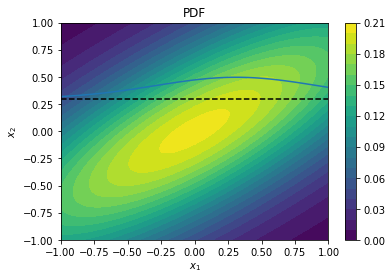

In [31]:
fig, ax = plt.subplots()
cs = ax.contourf(xx, yy, mvn_pdf, levels=20)
fig.colorbar(cs)
ax.plot(x_grid, 0.3*cond_pdf+x2  )
ax.axhline(x2, linestyle='--', c='k')
ax.set_title("PDF")
ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')

Text(0.5, 0, '$x_{1}$')

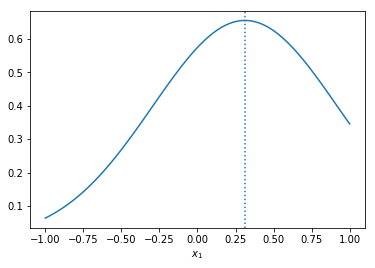

In [32]:
fig, ax = plt.subplots()
ax.plot(x_grid, cond_pdf)
ax.axvline(mean_cond, linestyle=':')
ax.set_xlabel('$x_{1}$')

---------------------------------

### Density and percentiles

In [33]:
mean = (1.0, 2.0)
covariance = [[1.0, 0.5],
              [0.5, 1.0]]

In [34]:
samples = stats.multivariate_normal.rvs(mean=mean, cov=covariance, size=10000)

In [35]:
x1, x2 = samples.T

/home/edy/lib/build/anaconda/anaconda/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


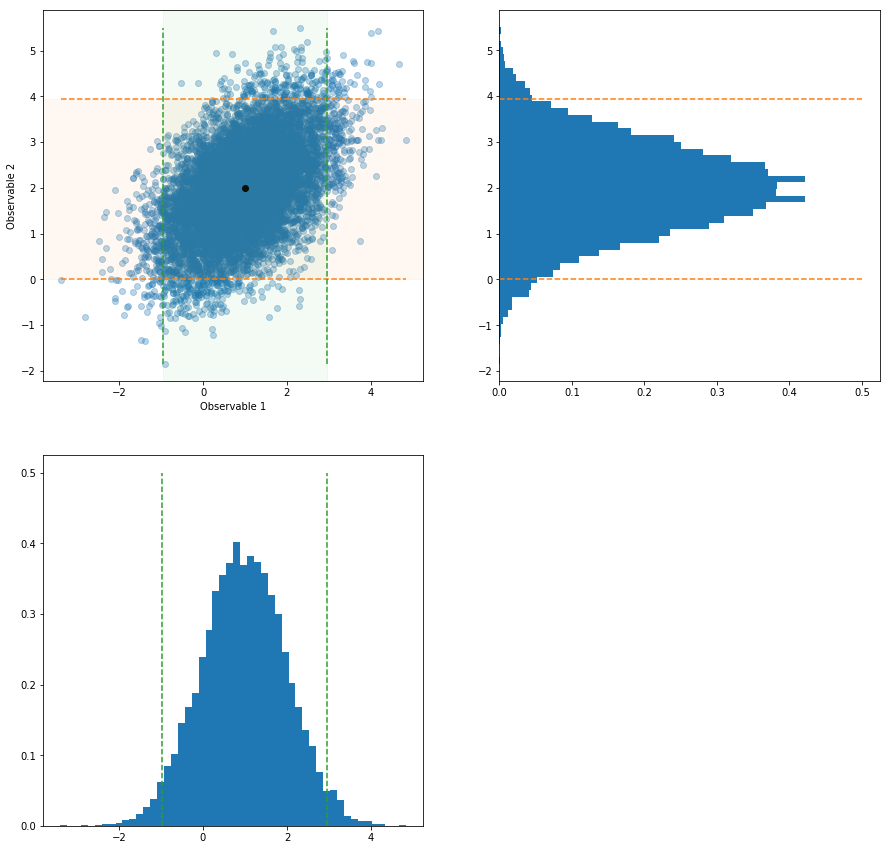

In [36]:
f,axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
axes = axes.flatten()

axes[0].scatter(x1, x2, alpha=0.3)
axes[0].scatter(mean[0], mean[1], c='k')
axes[0].set_xlabel(r'Observable 1')
axes[0].set_ylabel(r'Observable 2')

low_percentile = 2.5
high_percentile = 97.5

x1_min = x1.min()
x1_max = x1.max()
x2_min = x2.min()
x2_max = x2.max()

x1_low  = np.percentile(x1, low_percentile)
x1_high = np.percentile(x1, high_percentile)

x2_low  = np.percentile(x2, low_percentile)
x2_high = np.percentile(x2, high_percentile)

axes[0].hlines(x2_low,  x1_min, x1_max, linestyle='--', color='C1')
axes[0].hlines(x2_high, x1_min, x1_max, linestyle='--', color='C1')
axes[0].vlines(x1_low,  x2_min, x2_max, linestyle='--', color='C2')
axes[0].vlines(x1_high, x2_min, x2_max, linestyle='--', color='C2')
axes[0].axvspan(x1_low, x1_high, alpha=0.05, color='C2')
axes[0].axhspan(x2_low, x2_high, alpha=0.05, color='C1')

axes[1].hist(samples[:,1], bins=50, orientation="horizontal", normed=True);
axes[1].hlines(x2_low,  0.0, 0.5, linestyle='--', color='C1')
axes[1].hlines(x2_high, 0.0, 0.5, linestyle='--', color='C1')


axes[2].hist(samples[:,0], bins=50, normed=True)
axes[2].vlines(x1_low,  0.0, 0.5, linestyle='--', color='C2')
axes[2].vlines(x1_high, 0.0, 0.5, linestyle='--', color='C2')

f.delaxes(axes[3])

In [37]:
ngridpts = 20

In [38]:
k = stats.kde.gaussian_kde(samples.T)
x1i, x2i = np.mgrid[x1.min():x1.max():ngridpts*1j, x2.min():x2.max():ngridpts*1j]
zi = k(np.vstack([x1i.flatten(), x2i.flatten()]))

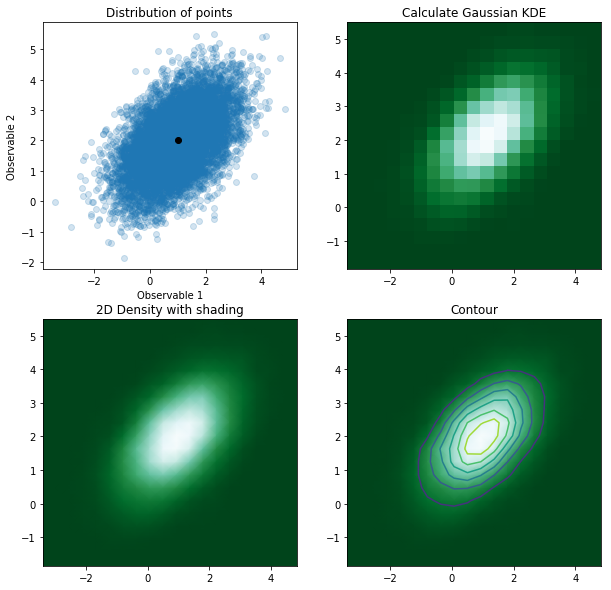

In [39]:
f,axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes = axes.flatten()
axes[0].scatter(x1, x2, alpha=0.2)
axes[0].scatter(mean[0], mean[1], c='k')
axes[0].set_xlabel(r'Observable 1')
axes[0].set_ylabel(r'Observable 2')
axes[0].set_title(r'Distribution of points')

axes[1].set_title('Calculate Gaussian KDE')
axes[1].pcolormesh(x1i, x2i, zi.reshape(x2i.shape), cmap=plt.cm.BuGn_r)

axes[2].set_title('2D Density with shading')
axes[2].pcolormesh(x1i, x2i, zi.reshape(x1i.shape), shading='gouraud', cmap=plt.cm.BuGn_r)

axes[3].set_title('Contour')
axes[3].pcolormesh(x1i, x2i, zi.reshape(x1i.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[3].contour(x1i, x2i, zi.reshape(x1i.shape))